In [1]:
#http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

1. DecisionTreeClassifier takes as input two arrays.
1. X array- [n_samples, n_features] holding the training samples
1. Y array- of integer values, size [n_samples] holding the class labels for the training samples

Decision tree construction using the Iris dataset

The iris dataset classifies iris plant into its 3 varieties (setosa, versicolor, virginica) based on sepal length, sepal width, petal length, petal width.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris 

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [4]:
iris.feature_names # what are the feature names(columns) of the iris datasets

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names #the target is classificatio of the iris plant into setosa, versicolor, virginica

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [6]:
len(iris.data)

150

In [7]:
len(iris.target)

150

In [8]:
import pandas as pd #make a dataframe using the feature names and data in the iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [9]:
df['target']=iris.target #add target to the dataframe
df['iris_class']=df['target']
df['iris_class'].dtypes

dtype('int64')

In [10]:
df['iris_class'].astype('O')

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: iris_class, dtype: object

In [11]:
df['iris_class']=df['iris_class'].map({0:'setosa', 1:'versicolor', 2: 'virginica'})

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [13]:
df.shape

(150, 6)

In [14]:
df['iris_class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: iris_class, dtype: int64

In [15]:

clf=tree.DecisionTreeClassifier() # fit a decision tree classifier
clf = clf.fit(iris.data,iris.target) #clf = clf.fit(iris.data,df['iris_class]
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
clf.predict(iris.data[:,:]) #predicting the values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
clf.predict(iris.data[:1,:])

array([0])

In [18]:
clf.predict_proba(iris.data[:1,:])

array([[ 1.,  0.,  0.]])

In [19]:
df['predicted'] = clf.predict(iris.data[:,:]) #assigning the predicted values to the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_class,predicted
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


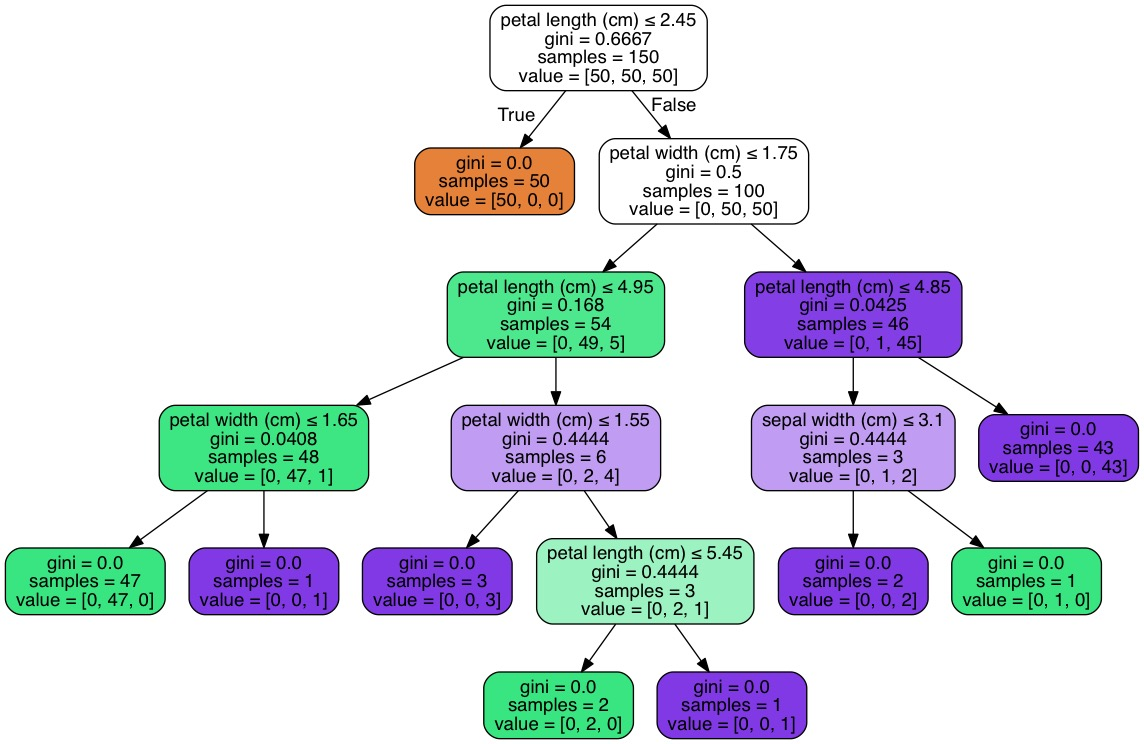

In [20]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,  
                feature_names=iris.feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())


In [21]:
# The same decision tree using iris_class (setosa, versicolor, virginica) as y value instead of the 0 and 1 as target
clf=tree.DecisionTreeClassifier() # fit a decision tree classifier
clf = clf.fit(iris.data,df['iris_class']) #clf = clf.fit(iris.data,df['iris_class]
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [22]:
clf.predict(iris.data)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [23]:
clf.predict_proba(iris.data)

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

In [24]:
df['predicted_class'] = clf.predict(iris.data[:,:]) #assigning the predicted values to the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_class,predicted,predicted_class
0,5.1,3.5,1.4,0.2,0,setosa,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa,0,setosa


In [25]:
clf.feature_importances_


array([ 0.02666667,  0.        ,  0.05072262,  0.92261071])

In [26]:
feat_imp=pd.DataFrame(data=clf.feature_importances_, index=['sep_len','sep_wid','pet_len','pet_wid'])#, columns=iris.feature_names)
feat_imp

,0
sep_len,0.026667
sep_wid,0.000000
pet_len,0.050723
pet_wid,0.922611


In [27]:
clf4=tree.DecisionTreeClassifier(max_depth=4) # fit a decision tree classifier
clf4 = clf4.fit(iris.data,df['iris_class']) #clf = clf.fit(iris.data,df['iris_class]
clf4

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

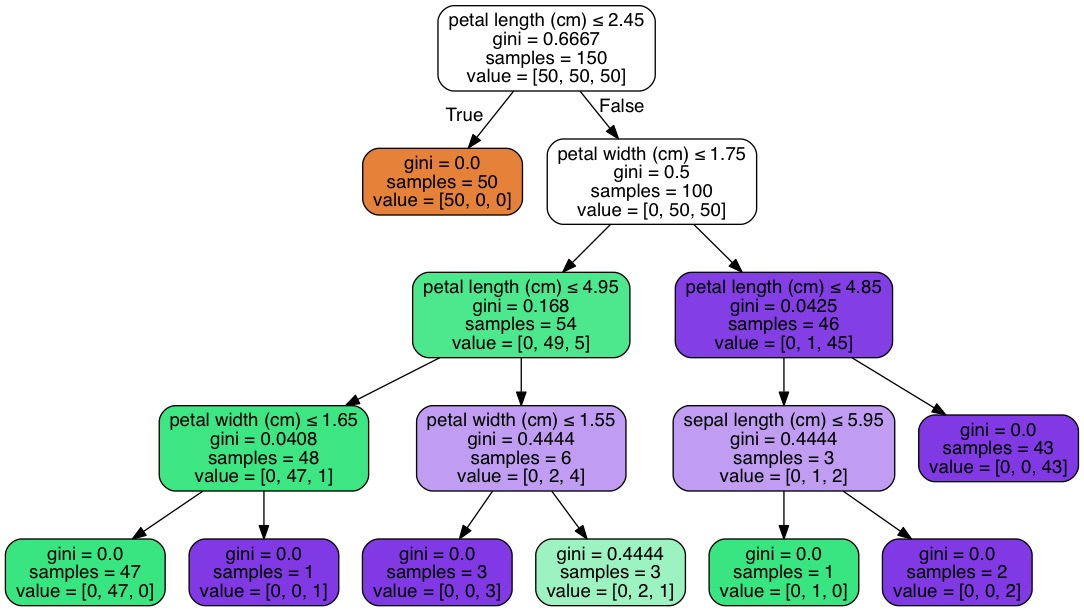

In [28]:
dot_data = StringIO()  
export_graphviz(clf4, out_file=dot_data,  
                feature_names=iris.feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())

In [29]:
clf4.predict(iris.data)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [30]:
clf4.feature_importances_

array([ 0.01351351,  0.        ,  0.55816482,  0.42832166])

In [31]:
feat_imp4=pd.DataFrame(data=clf4.feature_importances_, index=['sep_len','sep_wid','pet_len','pet_wid'])#, columns=iris.feature_names)
feat_imp4 #max depth =4

,0
sep_len,0.013514
sep_wid,0.000000
pet_len,0.558165
pet_wid,0.428322


In [32]:
clf3=tree.DecisionTreeClassifier(max_depth=3) # fit a decision tree classifier
clf3 = clf3.fit(iris.data,df['iris_class']) #clf = clf.fit(iris.data,df['iris_class]
clf3

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

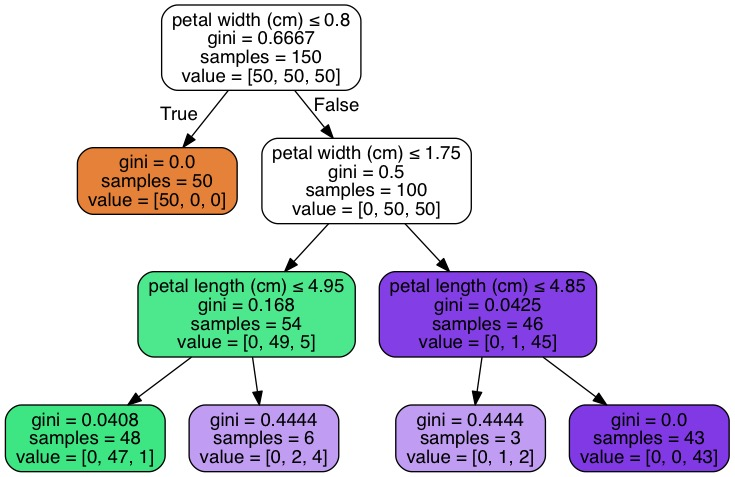

In [33]:
dot_data = StringIO()  
export_graphviz(clf3, out_file=dot_data,  
                feature_names=iris.feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())

In [34]:
feat_imp3=pd.DataFrame(data=clf3.feature_importances_, index=['sep_len','sep_wid','pet_len','pet_wid'])#, columns=iris.feature_names)
feat_imp3 #max depth =3

,0
sep_len,0.000000
sep_wid,0.000000
pet_len,0.053936
pet_wid,0.946064


In [35]:
feat_imp4=pd.DataFrame(data=clf4.feature_importances_, index=['sep_len','sep_wid','pet_len','pet_wid'])#, columns=iris.feature_names)
print "max_depth=4:",feat_imp4 #max depth =4
print feat_imp3 #max depth =3
feat_imp #max depth = none

max_depth=4:                 0
sep_len  0.013514
sep_wid  0.000000
pet_len  0.558165
pet_wid  0.428322
                0
sep_len  0.000000
sep_wid  0.000000
pet_len  0.053936
pet_wid  0.946064


,0
sep_len,0.026667
sep_wid,0.000000
pet_len,0.050723
pet_wid,0.922611


Automatically created module for IPython interactive environment


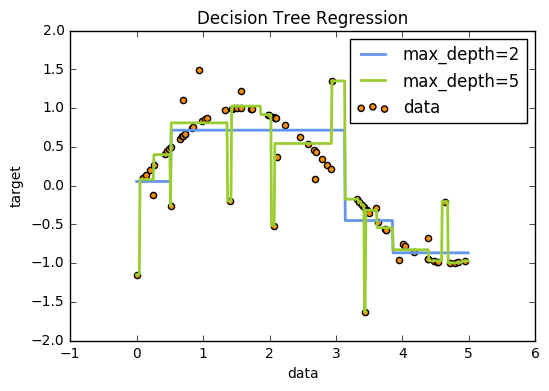

In [36]:
# Decision tree regressor from scikit example

print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Automatically created module for IPython interactive environment


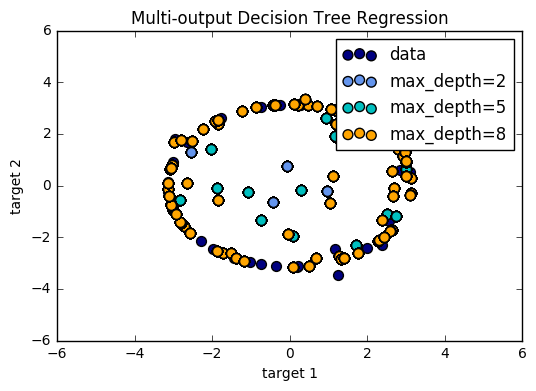

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 50
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="c", s=s, label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s, label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend()
plt.show()

Automatically created module for IPython interactive environment


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


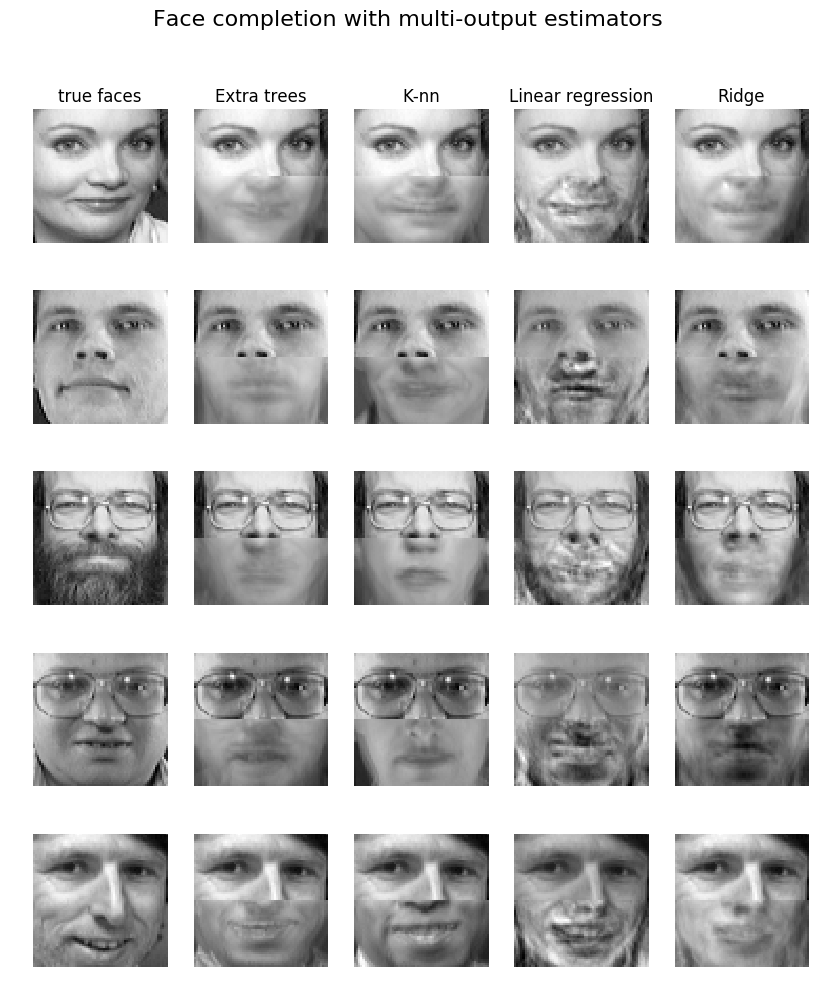

In [38]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
X_train = train[:, :np.ceil(0.5 * n_pixels)]  # Upper half of the faces
y_train = train[:, np.floor(0.5 * n_pixels):]  # Lower half of the faces
X_test = test[:, :np.ceil(0.5 * n_pixels)]
y_test = test[:, np.floor(0.5 * n_pixels):]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")


    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_class,predicted,predicted_class
0,5.1,3.5,1.4,0.2,0,setosa,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa,0,setosa


In [41]:
df.columns

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)', u'target', u'iris_class', u'predicted',
       u'predicted_class'],
      dtype='object')

In [42]:
X=df[[u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)']]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
y=df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [44]:
from sklearn.grid_search import GridSearchCV

In [45]:
param = {'max_depth':[1,2,3,4,5],
        'max_features':[1,2,3],
        'min_samples_split':[1,2,3,4,5],
        'min_samples_leaf':[1,2,3]}

gsm = GridSearchCV(tree.DecisionTreeClassifier(random_state=5), param,verbose=True, n_jobs=-1)

In [46]:
gsm.fit(X,y)

Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:    3.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=5, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [1, 2, 3], 'min_samples_split': [1, 2, 3, 4, 5], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [47]:
gsm.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=5, splitter='best')

In [48]:
gsm.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 1}

In [49]:
clfbest=tree.DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf = 1, min_samples_split=1) # instantiate a decision tree classifier
clfbest = clfbest.fit(X,y) 
clfbest

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [50]:
print clfbest.predict(X)  
print clfbest.predict_proba(X) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 1.          0.          0.  

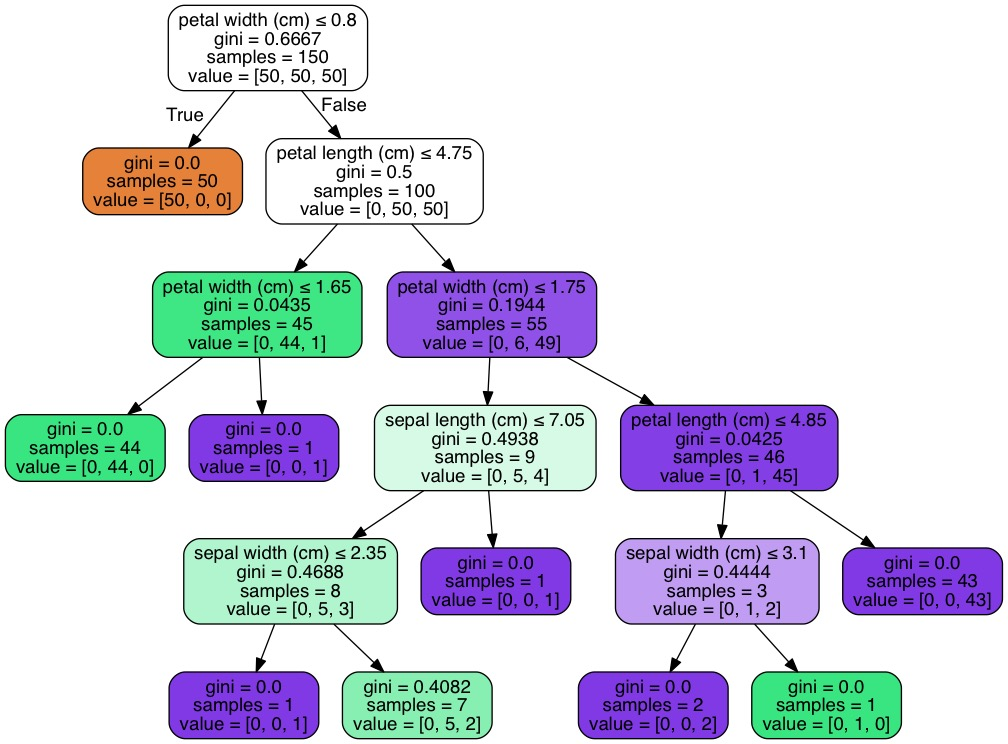

In [51]:
dot_data = StringIO()  
export_graphviz(clfbest, out_file=dot_data, feature_names=iris.feature_names,
                filled=True, rounded=True,
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())

In [52]:
clfbest.feature_importances_

array([ 0.00714869,  0.02291667,  0.39093686,  0.57899778])

In [53]:
feat_impbest=pd.DataFrame(data=clfbest.feature_importances_, index=['sep_len','sep_wid','pet_len','pet_wid'])#, columns=iris.feature_names)
feat_impbest #max depth =5

,0
sep_len,0.007149
sep_wid,0.022917
pet_len,0.390937
pet_wid,0.578998


In [54]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3, random_state=42)

In [55]:
model=tree.DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf = 1, min_samples_split=1)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [56]:
preds = model.predict(Xtest)
preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])

In [57]:
np.array(ytest)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])

In [99]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, Xtest, ytest,cv=3).mean()


0.97619047619047628

In [107]:
n_nodes = model.tree_.node_count
n_nodes

19

In [118]:
print model.tree_.feature
print model.apply(Xtest)
print model.tree_.threshold

[ 2 -2  2  2 -2  0 -2 -2  3  2 -2  1 -2 -2  2  1 -2 -2 -2]
[ 7  1 18  7 10  1  4 18  7  4 18  1  1  1  1  7 18  4  7 18  1 18  1 18 18
 18 18 18  1  1  1  1  4  1  1 18  7  1  1  1 18  7  7  1  1]
[ 2.45000005 -2.          4.75        4.44999981 -2.          5.1500001  -2.
 -2.          1.75        4.94999981 -2.          2.6500001  -2.         -2.
  4.85000038  3.0999999  -2.         -2.         -2.        ]


In [110]:
print("The binary tree structure has %s nodes" % n_nodes)

The binary tree structure has 19 nodes


In [58]:
Xtrain.columns

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)'],
      dtype='object')

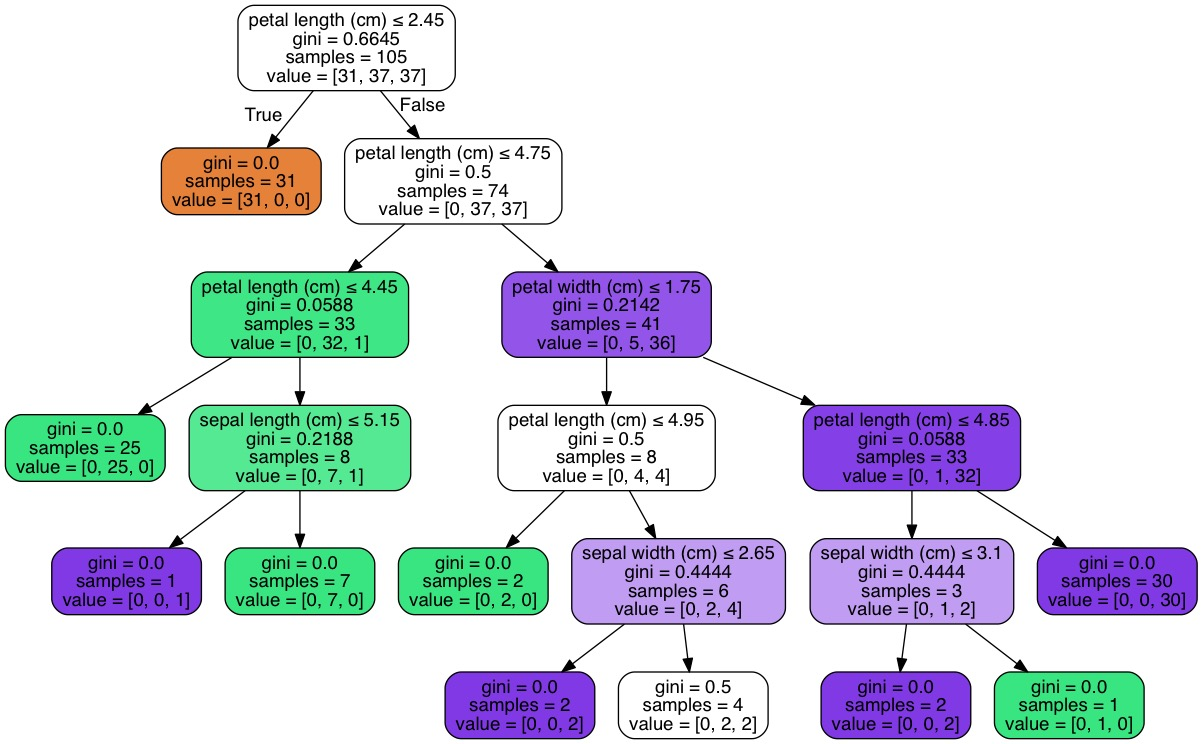

In [59]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())

In [60]:
model.feature_importances_

array([ 0.02582209,  0.02951096,  0.90274524,  0.04192171])

In [61]:
ttsplit_feat=pd.DataFrame(data=model.feature_importances_, index=['sep_len','sep_wid','pet_len','pet_wid'])
ttsplit_feat

,0
sep_len,0.025822
sep_wid,0.029511
pet_len,0.902745
pet_wid,0.041922


In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,model.predict(Xtest))
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [63]:
pd.DataFrame(cm,index=iris.target_names,columns=['predicted_'+X for X in iris.target_names])

,predicted_setosa,predicted_versicolor,predicted_virginica
setosa,19,0,0
versicolor,0,13,0
virginica,0,0,13


In [ ]:
# references:
#http://scikit-learn.org/stable/modules/tree.html
#http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

#from sklearn.datasets import load_iris #import datasets for iris

iris = load_iris() #load iris dataset from datasets and assign the name 'iris'
iris # provides the description of the entire iris datset
iris.feature_names # columns= sepal length, sepal width, petal length, petal width
iris.target_names #the target names are setosa, versicolor, virginica
len(iris.data) # total of 150 data

#import pandas as pd 
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) #make a dataframe using the feature names and data in the iris dataset
df['target']=iris.target #add target to the dataframe
df['iris_class']=df['iris_class'].map({0:'setosa', 1:'versicolor', 2: 'virginica'})

#from sklearn import tree
clf=tree.DecisionTreeClassifier() # instantiate a decision tree classifier
clf = clf.fit(iris.data,iris.target) #fit a Decision tree classifier to the dataset
clf

clf.predict(iris.data[:,:]) #predicting for all input data
clf.predict(iris.data[:1,:]) #predicting for one specific input all input
clf.predict_proba(iris.data[:1,:]) #predicting the probability of being in a specific class
df['predicted'] = clf.predict(iris.data[:,:]) #assigning the predicted values to the dataframe

#from sklearn.externals.six import StringIO
#from sklearn.tree import export_graphviz
#import pydotplus
#from IPython.display import Image

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names,
                filled=True, rounded=True,
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())

#This will create a dataframe with the features and the importance.
clf.feature_importances_
feat_imp=pd.DataFrame(data=clf.feature_importances_, index['sep_len','sep_wid','pet_len','pet_wid'])#, columns=iris.feature_names)
feat_imp

## Do a gridsearch first to find the best parameters to fit a model

#from sklearn.grid_search import GridSearchCV
X=df[[u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)', u'petal width (cm)']]
y=df['target'] # define X and y for the grid search

#define the parameters for gridsearch and DecisionTreeClassifier
param = {'max_depth':[1,2,3,4,5],
        'max_features':[1,2,3],
        'min_samples_split':[1,2,3,4,5],
        'min_samples_leaf':[1,2,3]}

gsm = GridSearchCV(tree.DecisionTreeClassifier(random_state=5), param,verbose=True, n_jobs=-1)
gsm.fit(X,y) #fit the model
gsm.best_params_

# With the best parameters fit a new model using the entire dataset
clfbest=tree.DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf = 1, min_samples_split=1) # instantiate a decision tree classifier
clfbest = clfbest.fit(X,y) 
clfbest

clfbest.predict(X)  # Do the predictions using the best parameters
clfbest.predict_proba(X)

#print the tree with the best model using the best parameters from gridsearch
dot_data = StringIO()  
export_graphviz(clfbest, out_file=dot_data, feature_names=iris.feature_names,
                filled=True, rounded=True,
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())

# with the feature of importance create a dataframe
clfbest.feature_importances_
feat_imp=pd.DataFrame(data=clf.feature_importances_, index['sep_len','sep_wid','pet_len','pet_wid'])#, columns=iris.feature_names)
feat_imp

#use a train test split to build a model, train and test the model
#from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3, random_state=42)
model=tree.DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf = 1, min_samples_split=1)
model.fit(Xtrain,ytrain)

#print the tree

dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())

model.feature_importances_
ttsplit_feat=pd.DataFrame(data=model.feature_importances_, index=['sep_len','sep_wid','pet_len','pet_wid'])
ttsplit_feat

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,model.predict(Xtest))
cm

# dataframe for the confusion matrix
pd.DataFrame(cm,index=iris.target_names,columns=['predicted_'+X for X in iris.target_names])

